### Face and Eye Detection

#### Acknowledgements

- Blog Article: https://docs.opencv.org/3.4.3/d7/d8b/tutorial_py_face_detection.html
- GitHub Code: None

#### Packages

In [1]:
import cv2 as pkg_cv
import matplotlib.pyplot as pkg_plot
import numpy as pkg_num

#### Common

In [2]:
%matplotlib inline

In [3]:
def load_image(file_name):
    input_image = pkg_cv.imread('../data/images/gan/' + file_name)

    # Get the images
    color_image = pkg_cv.cvtColor(input_image, pkg_cv.COLOR_BGR2RGB)
    gray_image = pkg_cv.cvtColor(input_image, pkg_cv.COLOR_BGR2GRAY)

    return color_image, gray_image


In [4]:
def detect_face_eyes(face_classifier, eye_classifier, color_image, gray_image):
    face_cascade = pkg_cv.CascadeClassifier('../data/opencv/haarcascades/' + face_classifier)
    eye_cascade = pkg_cv.CascadeClassifier('../data/opencv/haarcascades/' + eye_classifier)

    # Copy the image to add annotations
    annotated_color_image = pkg_num.copy(color_image)

    faces = face_cascade.detectMultiScale(gray_image, 1.3, 5)
    for (x,y,w,h) in faces:
        pkg_cv.rectangle(annotated_color_image,(x,y),(x+w,y+h),(255,0,0),2)
        roi_color = annotated_color_image[y:y+h, x:x+w]
        roi_gray = gray_image[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        for (ex,ey,ew,eh) in eyes:
            pkg_cv.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

    return annotated_color_image

In [5]:
def show_image_tiles(images):
    fx, plots = pkg_plot.subplots(1, len(images), figsize=(16,8))

    for i in range(len(images)):
        plots[i].set_title(images[i]['title'])
        plots[i].imshow(images[i]['data'])

In [6]:
def annotate_face_eyes(image_file_name, face_classifier, eye_classifier):
    image_tiles = []
    color_image, gray_image = load_image(image_file_name)
    image_tiles.append({ 'title': 'Color Image', 'data' : color_image })
    image_tiles.append({ 'title': 'Gray Image', 'data' : gray_image })

    annotated_color_image = detect_face_eyes(face_classifier, eye_classifier, color_image, gray_image)
    image_tiles.append({ 'title': 'Annotated Image', 'data' : annotated_color_image })
    show_image_tiles(image_tiles)
        

#### Detection

In [7]:
regular_face_classifier_name = 'haarcascade_frontalface_default.xml'
extended_face_classifier_name = 'haarcascade_frontalcatface_extended.xml'
regular_eye_classifier_name = 'haarcascade_eye.xml'
eye_glasses_classifier_name = 'haarcascade_eye_tree_eyeglasses.xml'

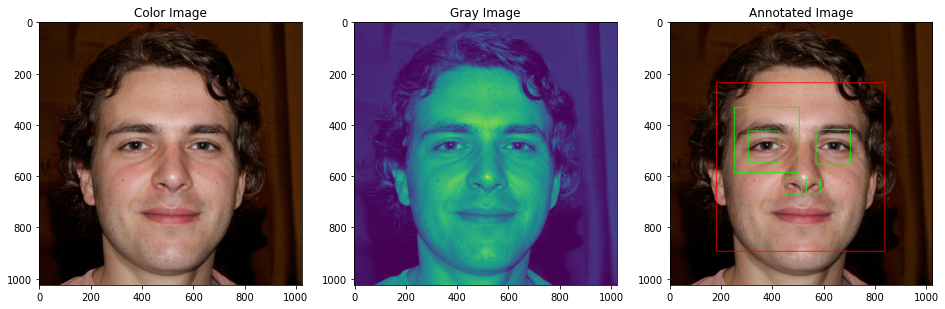

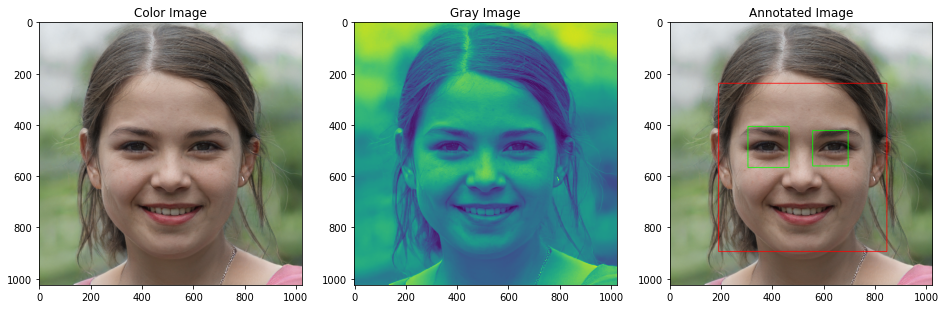

In [8]:
# Images without eye-glasses
annotate_face_eyes('gan_image_1.jpg', regular_face_classifier_name, regular_eye_classifier_name)
annotate_face_eyes('gan_image_2.jpg', regular_face_classifier_name, regular_eye_classifier_name)

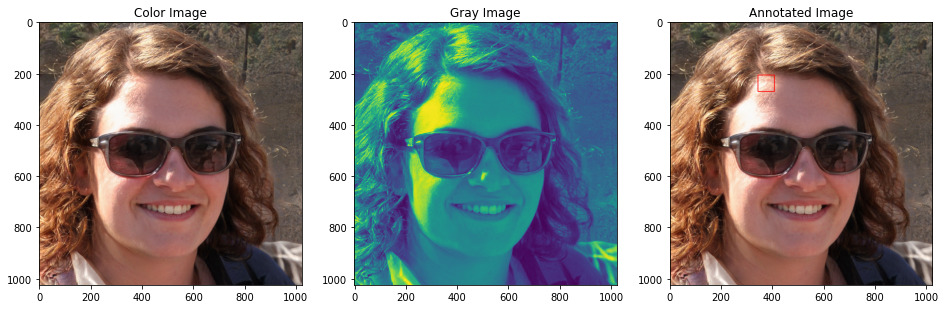

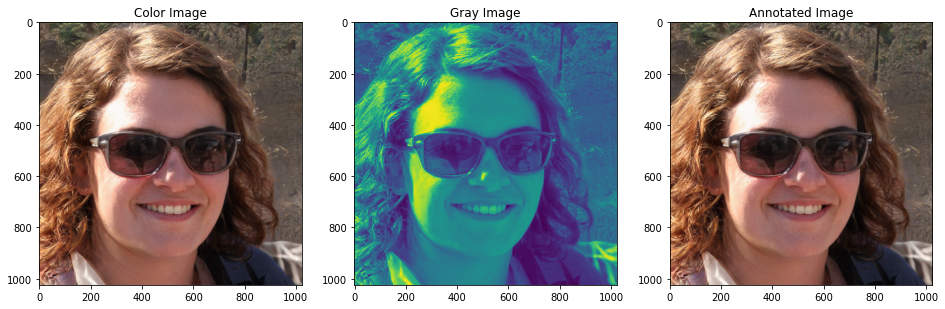

In [9]:
# Images with eye-glasses, where algorithm fails miserably with both classifiers
annotate_face_eyes('gan_image_3.jpg', regular_face_classifier_name, regular_eye_classifier_name)
annotate_face_eyes('gan_image_3.jpg', extended_face_classifier_name, eye_glasses_classifier_name)

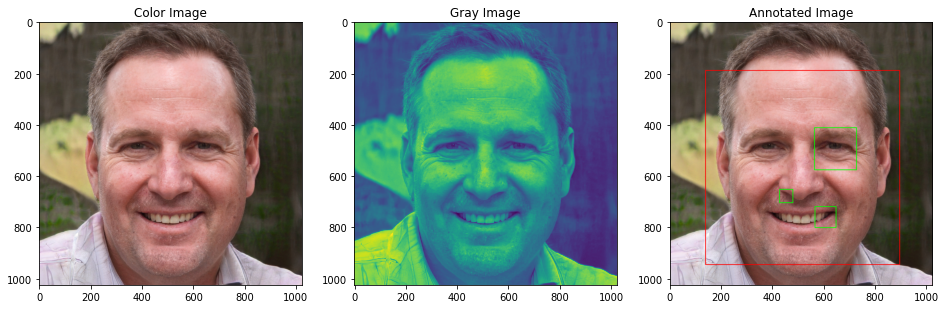

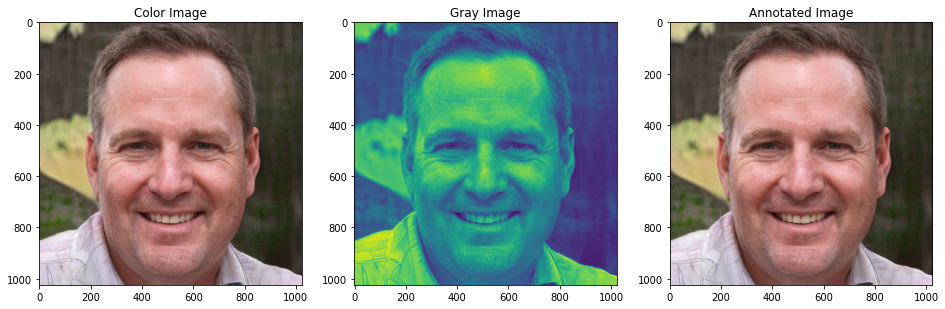

In [10]:
# Images without eye-glasses, where algorithm fails miserably with both classifiers
annotate_face_eyes('gan_image_4.jpg', regular_face_classifier_name, regular_eye_classifier_name)
annotate_face_eyes('gan_image_4.jpg', extended_face_classifier_name, eye_glasses_classifier_name)